In [14]:
import os
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(directory: str) -> pd.DataFrame:

    all_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                all_files.append(os.path.join(root, file))

    if not all_files:
        raise FileNotFoundError("No CSV files found in the given directory.")

    df = dd.read_csv(all_files)
    return df.compute()

data_path = "./Data/individual_book_train"

In [22]:
df = pd.read_csv("./Data/individual_book_train/stock_27.csv")

In [4]:
df.describe()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
count,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.0
mean,16007.459713,292.141403,0.999241,1.000883,0.998942,1.001184,94.563099,95.047862,75.959495,73.429307,27.0
std,9379.509645,173.528286,0.005421,0.005445,0.005441,0.005476,105.848809,105.229050,116.183756,99.975252,0.0
min,5.000000,0.000000,0.897584,0.903124,0.895621,0.903194,1.000000,1.000000,1.000000,1.000000,27.0
25%,7775.000000,141.000000,0.997414,0.998853,0.997140,0.999102,9.000000,9.000000,6.000000,7.000000,27.0
50%,15853.000000,289.000000,0.999313,1.000589,0.999084,1.000814,100.000000,100.000000,63.000000,54.000000,27.0
75%,23955.000000,442.000000,1.001049,1.002478,1.000792,1.002754,114.000000,114.000000,100.000000,100.000000,27.0
max,32767.000000,599.000000,1.075063,1.082831,1.075004,1.083596,7960.000000,5200.000000,10100.000000,10000.000000,27.0


In [23]:
df.shape

(873499, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873499 entries, 0 to 873498
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time_id            873499 non-null  int64  
 1   seconds_in_bucket  873499 non-null  int64  
 2   bid_price1         873499 non-null  float64
 3   ask_price1         873499 non-null  float64
 4   bid_price2         873499 non-null  float64
 5   ask_price2         873499 non-null  float64
 6   bid_size1          873499 non-null  int64  
 7   ask_size1          873499 non-null  int64  
 8   bid_size2          873499 non-null  int64  
 9   ask_size2          873499 non-null  int64  
 10  stock_id           873499 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 73.3 MB


In [24]:
df["midpoint1"] = (df["ask_price1"] + df["bid_price1"])/2
df["midpoint2"] = (df["ask_price2"] + df["bid_price2"])/2

df["bid_ask_spread1"] = df["ask_price1"] - df["bid_price1"]
df["bid_ask_spread2"] = df["ask_price2"] - df["bid_price2"]

df['log_return'] = np.log(df['midpoint1'] / df['midpoint1'].shift(1))
df = df.dropna(subset=['log_return'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873498 entries, 1 to 873498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time_id            873498 non-null  int64  
 1   seconds_in_bucket  873498 non-null  int64  
 2   bid_price1         873498 non-null  float64
 3   ask_price1         873498 non-null  float64
 4   bid_price2         873498 non-null  float64
 5   ask_price2         873498 non-null  float64
 6   bid_size1          873498 non-null  int64  
 7   ask_size1          873498 non-null  int64  
 8   bid_size2          873498 non-null  int64  
 9   ask_size2          873498 non-null  int64  
 10  stock_id           873498 non-null  int64  
 11  midpoint1          873498 non-null  float64
 12  midpoint2          873498 non-null  float64
 13  bid_ask_spread1    873498 non-null  float64
 14  bid_ask_spread2    873498 non-null  float64
 15  log_return         873498 non-null  float64
dtypes: floa

In [17]:
df.describe()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,midpoint1,midpoint2,bid_ask_spread1,bid_ask_spread2,log_return
count,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.0,873499.000000,873499.000000,873499.000000,873499.000000,8.734980e+05
mean,16007.459713,292.141403,0.999241,1.000883,0.998942,1.001184,94.563099,95.047862,75.959495,73.429307,27.0,1.000062,1.000063,0.001642,0.002242,3.173083e-09
std,9379.509645,173.528286,0.005421,0.005445,0.005441,0.005476,105.848809,105.229050,116.183756,99.975252,0.0,0.005393,0.005390,0.001313,0.001723,5.609990e-04
min,5.000000,0.000000,0.897584,0.903124,0.895621,0.903194,1.000000,1.000000,1.000000,1.000000,27.0,0.901161,0.900424,0.000031,0.000123,-6.770078e-02
25%,7775.000000,141.000000,0.997414,0.998853,0.997140,0.999102,9.000000,9.000000,6.000000,7.000000,27.0,0.998148,0.998156,0.000852,0.001233,-9.299353e-06
50%,15853.000000,289.000000,0.999313,1.000589,0.999084,1.000814,100.000000,100.000000,63.000000,54.000000,27.0,0.999955,0.999956,0.001293,0.001780,0.000000e+00
75%,23955.000000,442.000000,1.001049,1.002478,1.000792,1.002754,114.000000,114.000000,100.000000,100.000000,27.0,1.001742,1.001741,0.001982,0.002651,9.508086e-06
max,32767.000000,599.000000,1.075063,1.082831,1.075004,1.083596,7960.000000,5200.000000,10100.000000,10000.000000,27.0,1.078652,1.078976,0.033341,0.042618,9.435658e-02


/var/folders/0s/bt69j7tj0pd5rl5dzr4n6bth0000gn/T/ipykernel_1528/1895265252.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'forecast_{w}'] = df[col_name].shift(1)
/var/folders/0s/bt69j7tj0pd5rl5dzr4n6bth0000gn/T/ipykernel_1528/1895265252.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = df['log_return'].rolling(window=w).apply(lambda x: np.sqrt(np.sum(x**2)), raw=True)
/var/folders/0s/bt69j7tj0pd5rl5dzr4n6bth0000gn/T/ipykernel_1528/1895265252.py:10: PerformanceWarning: DataFrame is highly fragmented.  T

    window_size           mse
0             0  0.000000e+00
1            10  4.258758e-07
2            20  3.717532e-07
3            30  3.416702e-07
4            40  3.223473e-07
5            50  3.076659e-07
6            60  2.951660e-07
7            70  2.853205e-07
8            80  2.774920e-07
9            90  2.696597e-07
10          100  2.628998e-07
11          110  2.564418e-07
12          120  2.509698e-07
13          130  2.446451e-07
14          140  2.397307e-07
15          150  2.344824e-07
16          160  2.298901e-07
17          170  2.250839e-07
18          180  2.197801e-07
19          190  2.141267e-07
20          200  2.095102e-07
21          210  2.034147e-07
22          220  1.983736e-07
23          230  1.934837e-07
24          240  1.901417e-07
25          250  1.860189e-07
26          260  1.821435e-07
27          270  1.781106e-07
28          280  1.755984e-07
29          290  1.729942e-07
30          300  1.710289e-07
31          310  1.692357e-07
32        

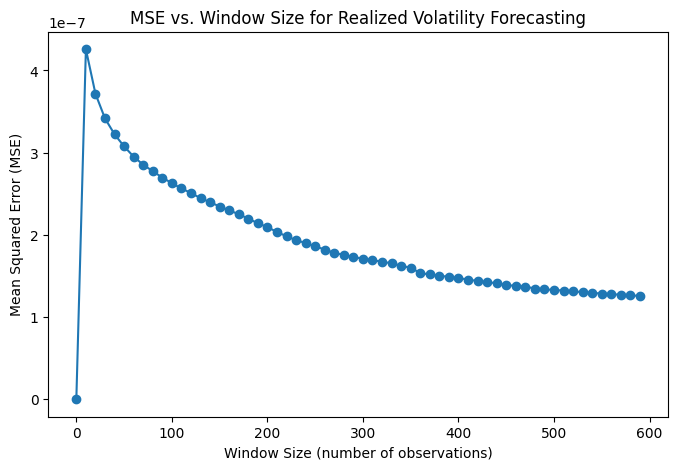

In [27]:
window_sizes = range(0, 600, 10)
results = []

for w in window_sizes:
    # Compute rolling realized volatility for window 'w'
    col_name = f'rolling_rv_{w}'
    df[col_name] = df['log_return'].rolling(window=w).apply(lambda x: np.sqrt(np.sum(x**2)), raw=True)
    
    # Create a simple forecast: using the previous period's volatility as the forecast
    df[f'forecast_{w}'] = df[col_name].shift(1)
    
    # Drop NA values before calculating error
    valid = df.dropna(subset=[col_name, f'forecast_{w}'])
    
    # Calculate mean squared error (MSE) between forecast and actual volatility
    mse = np.mean((valid[col_name] - valid[f'forecast_{w}'])**2)
    results.append({'window_size': w, 'mse': mse})

# Convert results to DataFrame for inspection
results_df = pd.DataFrame(results)
print(results_df)

# Plot MSE vs. Window Size
plt.figure(figsize=(8, 5))
plt.plot(results_df['window_size'], results_df['mse'], marker='o')
plt.xlabel('Window Size (number of observations)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Window Size for Realized Volatility Forecasting')
plt.show()